# 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 2. Load and Preprocessing data

In [7]:
df = pd.read_csv("C:/ML/Labwork4/dataset/DecisionTree/Loan_Prediction_Problem.csv")
df['Loan_Status'] = np.random.choice(['Y', 'N'], size=len(df))
df.drop('Loan_ID', axis=1, inplace=True)

df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].median(),
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Decision Tree

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 4. Predict and evaluate

In [9]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Classification Accuracy: {accuracy:.2f}")
print(f"Classification Error Rate: {error_rate:.2f}")

Classification Accuracy: 0.53
Classification Error Rate: 0.47


# 5. Set figure size and plot the decision tree

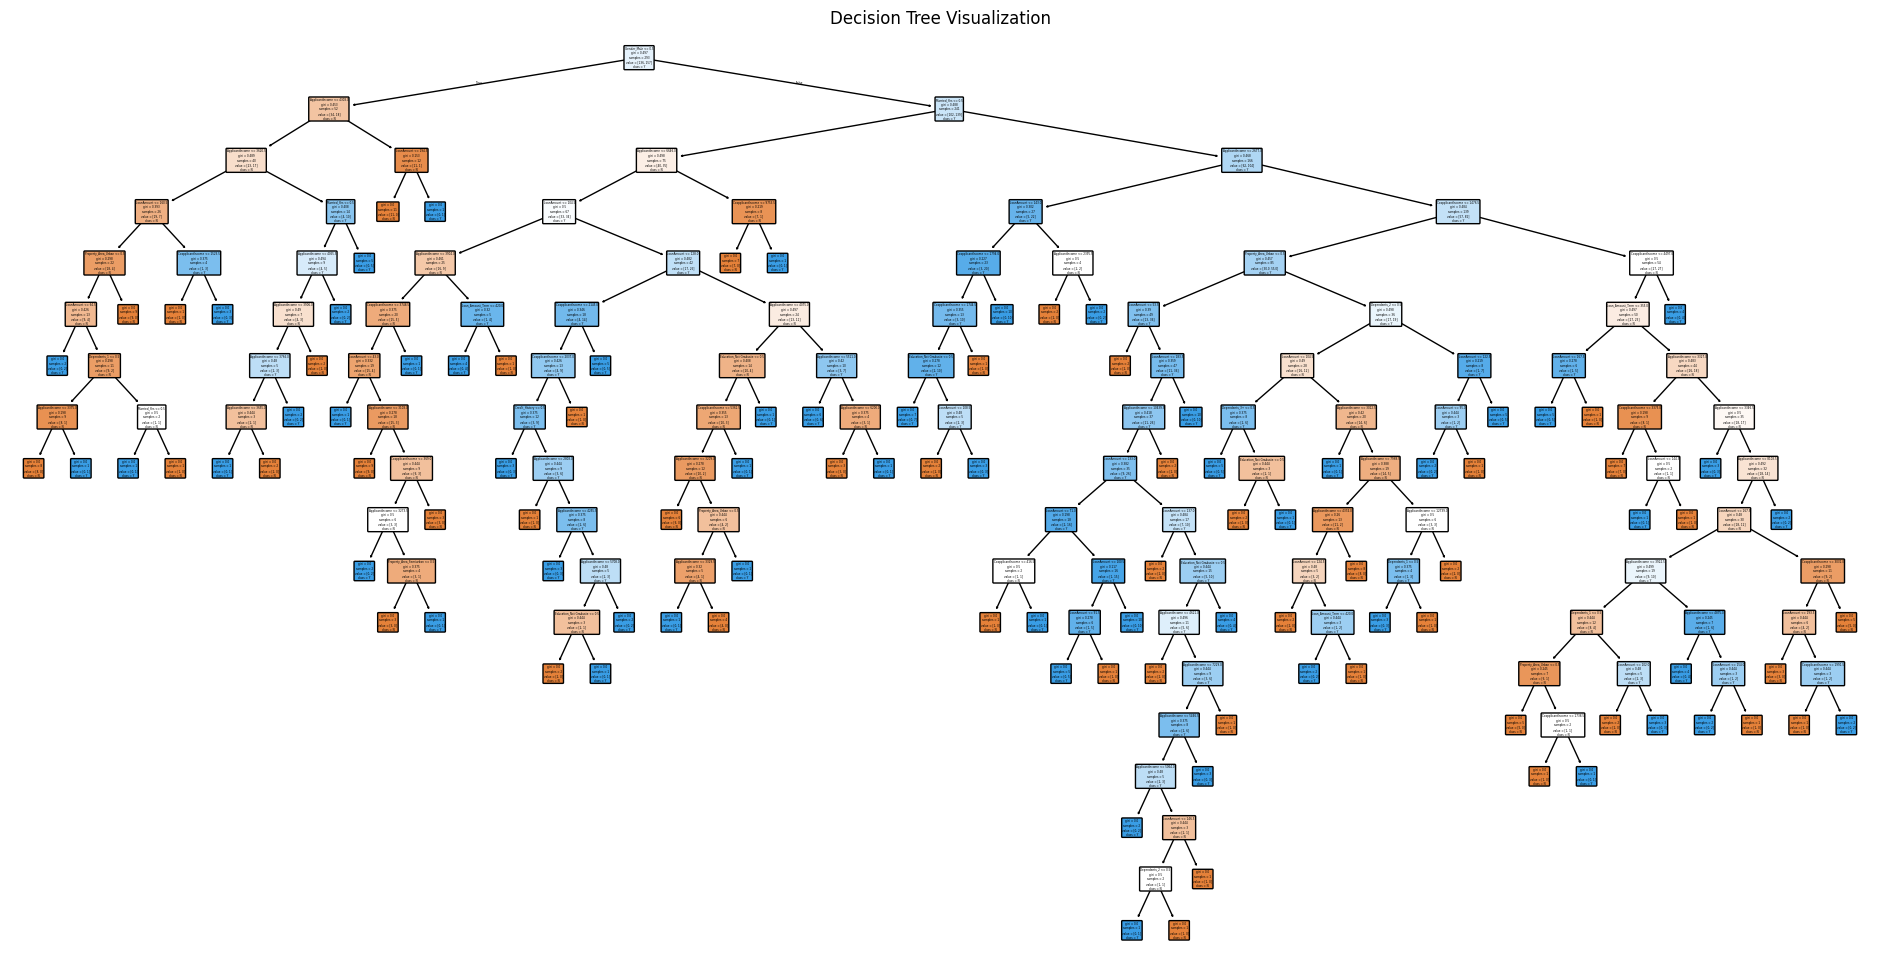

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(24, 12))
plot_tree(
    clf, 
    filled=True, 
    rounded=True, 
    feature_names=X.columns, 
    class_names=['N', 'Y']  # Based on dummy target
)
plt.title("Decision Tree Visualization")
plt.show()
plt.savefig("C:/ML/Labwork4/visualizations/DecisionTree/Loan_Prediction_Tree.png")